Primero llamamos a las librerías que necesitaremos

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from google.cloud import bigquery


In [3]:
import os
project_id = os.environ.get("GOOGLE_CLOUD_PROJECT")
api_json = os.environ.get("GOOGLE_APPLICATION_CREDENTIALS")


In [4]:
client = bigquery.Client(project_id)

In [5]:
# Construct a reference to the "covid19_open_data" dataset
dataset_ref = client.dataset("covid19_open_data", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

In [6]:
# List all the tables in the "covid19_open_data" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset
for table in tables:  
    print(table.table_id)

compatibility_view
covid19_open_data


In [7]:
# Construct a reference to the "full" table
table_ref = dataset_ref.table("covid19_open_data")

# API request - fetch the table
table = client.get_table(table_ref)

In [8]:
#print information on all the columns in the "full" table
table.schema

[SchemaField('location_key', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('date', 'DATE', 'NULLABLE', None, None, (), None),
 SchemaField('place_id', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('wikidata_id', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('datacommons_id', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('country_code', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('country_name', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('iso_3166_1_alpha_2', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('iso_3166_1_alpha_3', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('aggregation_level', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('new_confirmed', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('new_deceased', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('cumulative_confirmed', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('cumulat

In [9]:
#print information of the first five rows
client.list_rows(table, max_results=5).to_dataframe()

,location_key,date,place_id,wikidata_id,datacommons_id,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,...,cumulative_vaccine_doses_administered_pfizer,new_persons_fully_vaccinated_moderna,cumulative_persons_fully_vaccinated_moderna,new_vaccine_doses_administered_moderna,cumulative_vaccine_doses_administered_moderna,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,location_geometry
0,AD,2020-06-01,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,AD,AND,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT(1.555278 42.558333)
1,AD,2020-09-20,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,AD,AND,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT(1.555278 42.558333)
2,AD,2022-09-01,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,AD,AND,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT(1.555278 42.558333)
3,AD,2020-05-18,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,AD,AND,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT(1.555278 42.558333)
4,AD,2020-09-29,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,AD,AND,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,POINT(1.555278 42.558333)


We pick 5 elements to see what columns are not null 

In [10]:

query = """
SELECT *
FROM `bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE country_name = 'United States of America'
    AND NOT EXISTS (
        SELECT 1
        FROM UNNEST([CAST(date AS STRING), CAST(country_name AS STRING), CAST(cumulative_vaccine_doses_administered AS STRING), CAST(cumulative_deceased AS STRING), CAST(cumulative_deceased AS STRING), CAST(new_confirmed AS STRING), CAST(population_density AS STRING)]) AS value
        WHERE value IS NULL
    )
ORDER BY date DESC
LIMIT 1000;
"""
dry_run_config = bigquery.QueryJobConfig(dry_run=True)
dry_run_query_job = client.query(query, job_config=dry_run_config)
print("This query will process {} bytes.".format(dry_run_query_job.total_bytes_processed))
query_job = client.query(query)
results = query_job.to_dataframe()
# results




This query will process 12576008229 bytes.


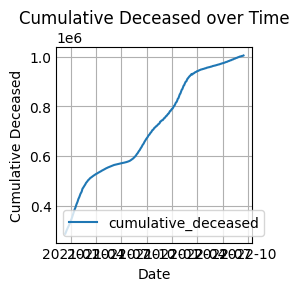

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot the data
results.plot(x='date', y='cumulative_deceased')
plt.xlabel('Date')
plt.ylabel('Cumulative Deceased')
plt.title('Cumulative Deceased over Time')
plt.show()


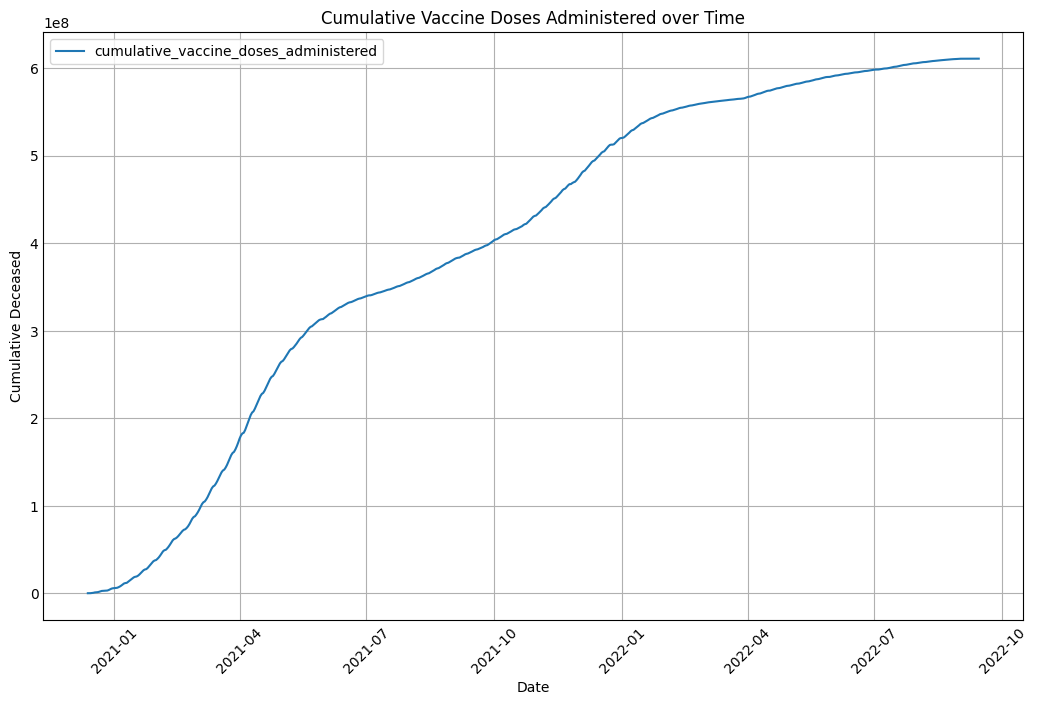

In [24]:

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
results.plot(x='date', y='cumulative_vaccine_doses_administered', ax=ax, title='Cumulative Vaccine Doses Administered over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Deceased')
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees
plt.show()


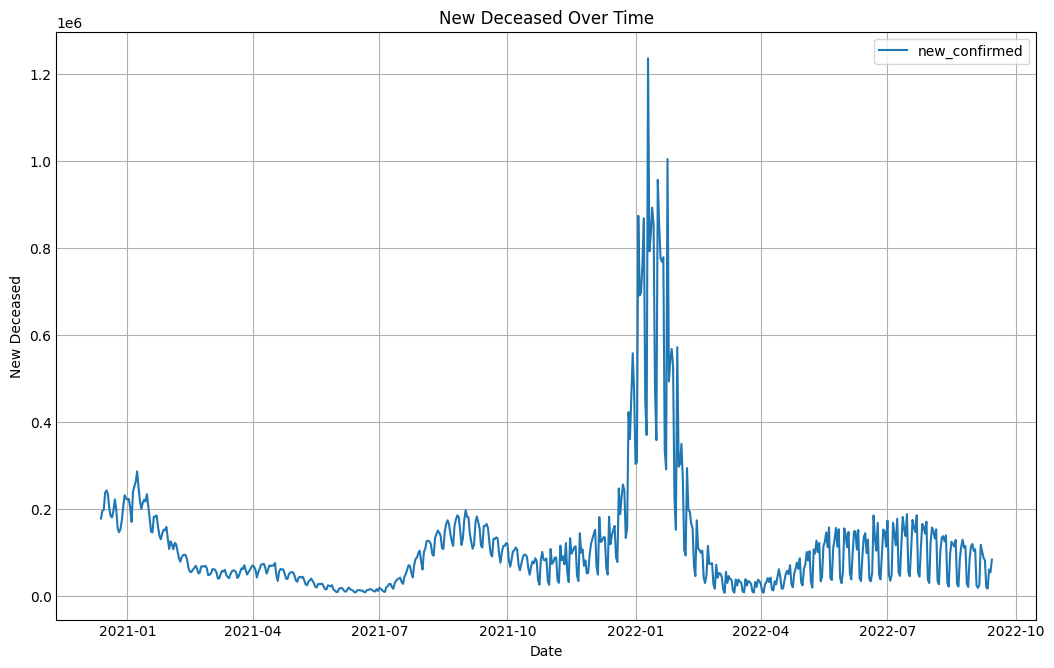

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
results.plot(x='date', y='new_confirmed', ax=ax, title='New Deceased Over Time')
plt.xlabel('Date')
plt.ylabel('New Deceased')

plt.show()

<Axes: title={'center': 'Density per Case over Time'}, xlabel='date'>

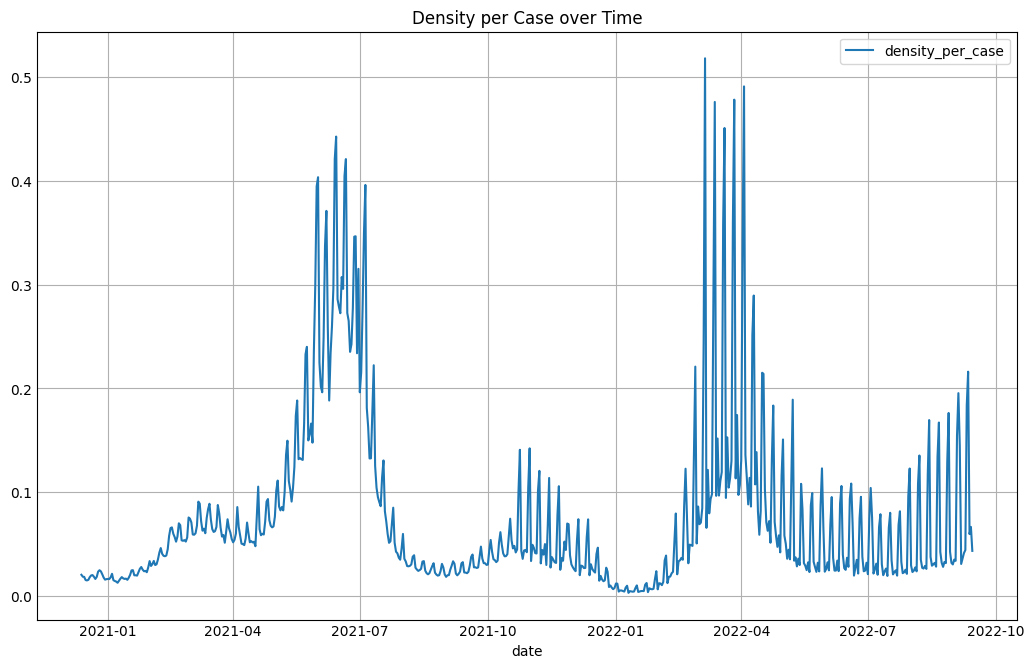

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
results['density_per_case'] = results['population_density']*100 / results['new_confirmed']
results.plot(x='date', y='density_per_case',ax=ax, title='Density per Case over Time')


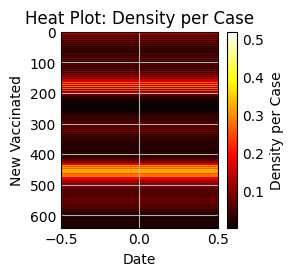

In [15]:
import matplotlib.pyplot as plt

# Filter the data based on the condition
filtered_results = results

# Create the heat plot
plt.imshow(filtered_results['density_per_case'].values.reshape(-1, 1), cmap='hot', aspect='auto')
plt.colorbar(label='Density per Case')
plt.xlabel('Date')
plt.ylabel('New Vaccinated')
plt.title('Heat Plot: Density per Case')
plt.show()


ValueError: Argument Z must be 2-dimensional.

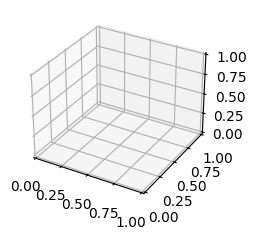

In [16]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm

plt.style.use('_mpl-gallery')

# Make data
X = results['date']
Y = results['density_per_case']
X, Y = np.meshgrid(X, Y)
Z = results['cumulative_deceased']

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()


TypeError: float() argument must be a string or a number, not 'datetime.date'